In [1]:
import numpy as np
import lalsimulation as lalsim
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt
import math
import lal
from scipy import interpolate
from scipy.interpolate import interp1d
from gw_eccentricity import load_waveform, load_data, get_available_methods, measure_eccentricity
from gw_eccentricity.load_data import get_available_waveform_origins, get_load_waveform_defaults, get_load_waveform_docs
import matplotlib.pyplot as plt
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import numpy as np
from tqdm import tqdm
%load_ext autoreload
%autoreload 2
from tqdm import tqdm

In [2]:
def f(u,mass):
    return math.pow(u,3.0/2.0)/(MTSUN_SI * mass * lal.PI)

In [3]:
def eccComp(e0,tref):
    q=2.0
    Mtot=50
    M1=q*Mtot/(1+q) * MSUN_SI
    M2=Mtot/(1+q) * MSUN_SI
    M=(M1+M2)/MSUN_SI
    e_min=e0
    phi_ref=0
    xmin=0.046415888336127795
    xref=0.045
    v, et, l, lmda, u, phi = lalsim.SimInspiralEccentricTDPNEvolveOrbit(phiRef=phi_ref,deltaT=1./2048,m1=M1,m2=M2, f_min=f(xmin,M), fRef=f(xref,M), e_min=e_min, O=-1)
    time1=np.empty(phi.data.length)
    time1[0]=phi.epoch
    for i in range(1,phi.data.length):
        time1[i]=time1[i-1]+et.deltaT
    #plt.plot(time1/(Mtot*MTSUN_SI),et.data.data,'b',label='orbital eccentricity')
    #plt.axvline(x=-4000,color='k',label='tref')
    intrp=interp1d(time1/(Mtot*MTSUN_SI),et.data.data,kind='cubic',fill_value='extrapolate')
    tref=tref
    ecc_ref1=intrp(tref)
    
    
    #new
    kwargs = {
    "approximant": "EccentricTD",
    "q": q,
    "ecc": e0,
    "chi1": [0.0,0.0,0.0],
    "chi2": [0.0,0.0,0.0],
    "mean_ano": 0.0,
    "Momega0": (xmin)**(3/2),
    "include_zero_ecc":True,
    }
    origin = "LAL"
    dataDict = load_waveform(origin, **kwargs)
    method = "ResidualAmplitude"
    return_dict = measure_eccentricity(tref_in=tref,method=method,dataDict=dataDict)
    ecc_ref2=return_dict['eccentricity']
    return abs(ecc_ref1-ecc_ref2)

100%|███████████████████████████████████████████| 38/38 [02:25<00:00,  3.83s/it]


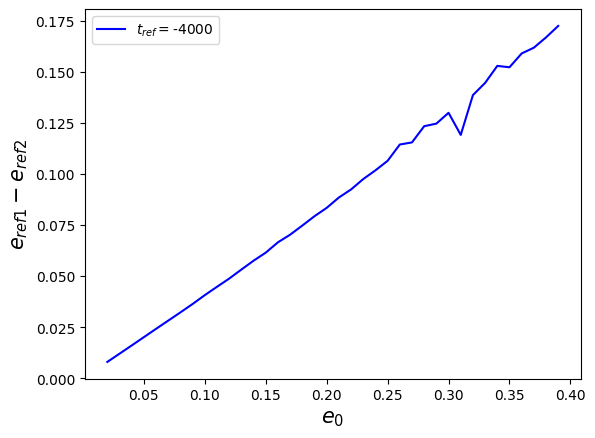

In [20]:
eccref_diff=[]
ecc0=[]
tref=-4000
for i in tqdm(np.arange(0.02,0.40,0.01)):
    eccref_diff.append(eccComp(i,tref))
    ecc0.append(i)
plt.plot(ecc0,eccref_diff,'b',label=r'$t_{ref}=$'+str(tref))
plt.xlabel(r'$e_0$',size=15)
plt.ylabel(r'$e_{ref1}-e_{ref2}$',size=15)
plt.legend()
plt.show()